In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

# Import pandas and read the charity_data.csv from the provided cloud URL.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
drop_columns = ['EIN', 'NAME']
application_df = application_df.drop(columns=drop_columns)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [ ]:
# Determine the number of unique values in each column.
application_df.nunique()

,0
APPLICATION_TYPE,17
AFFILIATION,6
CLASSIFICATION,71
USE_CASE,5
ORGANIZATION,4
STATUS,2
INCOME_AMT,9
SPECIAL_CONSIDERATIONS,2
ASK_AMT,8747
IS_SUCCESSFUL,2


In [ ]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156


In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = application_df['APPLICATION_TYPE'].value_counts()
application_types_to_replace = application_types_to_replace[application_types_to_replace < 500].index

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
Other,276


In [ ]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
application_df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
...,...
C4120,1
C8210,1
C2561,1


In [ ]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classifications_over_1 = application_df['CLASSIFICATION'].value_counts()
classifications_over_1 = classifications_over_1[classifications_over_1 > 1]
classifications_over_1

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
C1700,287
C4000,194
C5000,116


In [ ]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classification_counts = application_df['CLASSIFICATION'].value_counts()

classifications_to_replace = classification_counts[classification_counts < 1000].index

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
Other,2261
C3000,1918
C2100,1883


In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(
  application_df, columns=[
    'APPLICATION_TYPE',
    'AFFILIATION',
    'CLASSIFICATION',
    'USE_CASE',
    'ORGANIZATION',
    'INCOME_AMT',
    'SPECIAL_CONSIDERATIONS'
    ],
  dtype=int
)

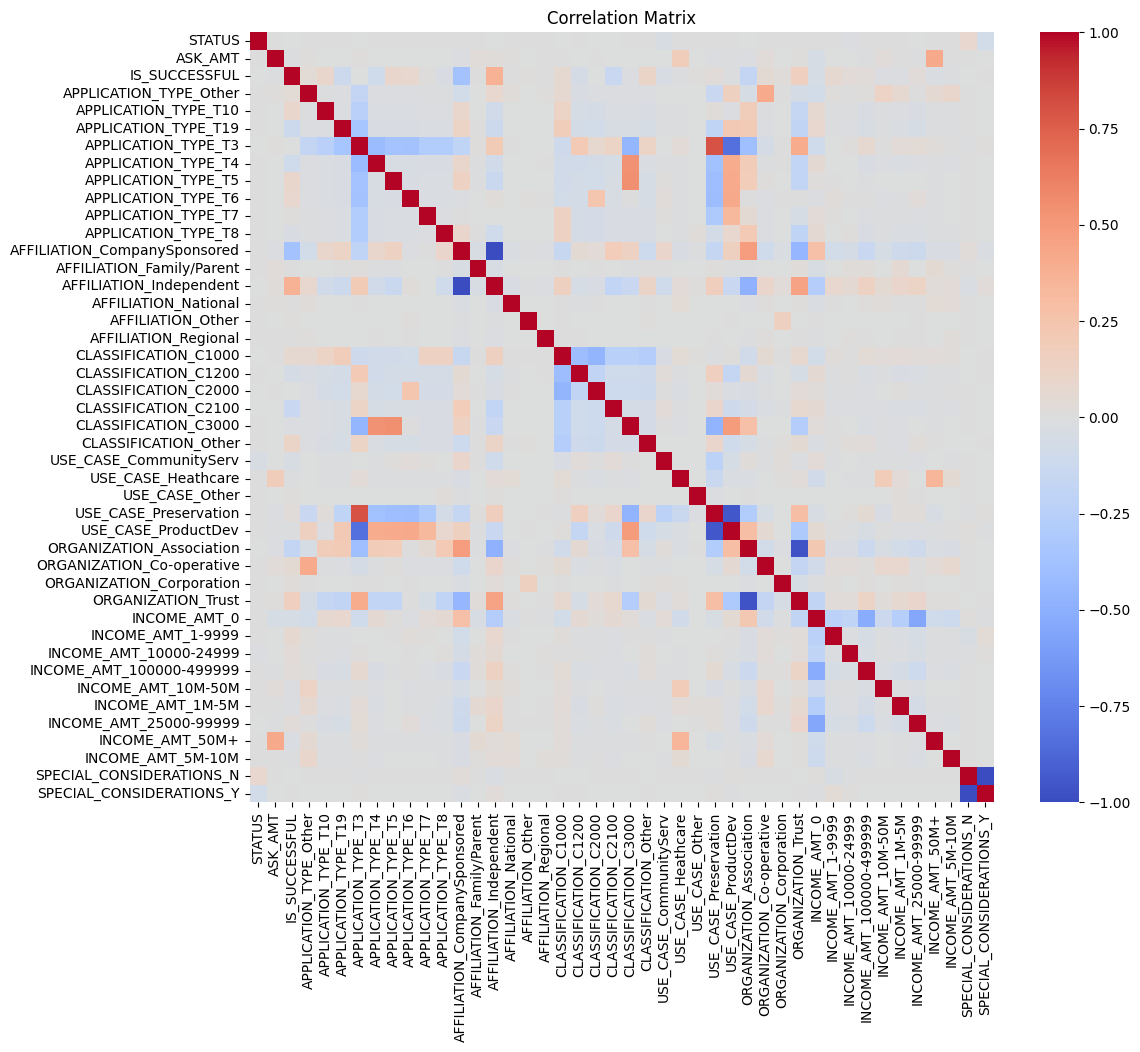

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(application_df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import numpy as np

# Compute the correlation matrix
corr_matrix = application_df.corr().abs()

# Select the upper triangle of the correlation matrix to avoid duplicate pairs
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than the threshold
threshold = 0.9
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

# Ensure that 'IS_SUCCESSFUL' (or any other important feature) isn't dropped
if 'IS_SUCCESSFUL' in to_drop:
    to_drop.remove('IS_SUCCESSFUL')

# Drop only the selected columns
df_reduced = application_df.drop(columns=to_drop)

print(f"Columns dropped due to high correlation: {to_drop}")
print(f"Remaining columns: {df_reduced.columns.tolist()}")

Columns dropped due to high correlation: ['AFFILIATION_Independent', 'USE_CASE_ProductDev', 'ORGANIZATION_Trust', 'SPECIAL_CONSIDERATIONS_Y']
Remaining columns: ['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other', 'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8', 'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent', 'AFFILIATION_National', 'AFFILIATION_Other', 'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200', 'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000', 'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare', 'USE_CASE_Other', 'USE_CASE_Preservation', 'ORGANIZATION_Association', 'ORGANIZATION_Co-operative', 'ORGANIZATION_Corporation', 'INCOME_AMT_0', 'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999', 'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M', 'INCO

In [ ]:
df_reduced

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N
0,1,5000,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1,108590,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1,5000,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,6692,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
34295,1,5000,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
34296,1,5000,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
34297,1,5000,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
# Select only 'ASK_AMT'column for outlier removal
numerical_cols = ['ASK_AMT']

# Calculate IQR
Q1 = df_reduced[numerical_cols].quantile(0.25)
Q3 = df_reduced[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter rows based on IQR
df_reduced = df_reduced[~((df_reduced[numerical_cols] < (Q1 - 1.5 * IQR)) |
                                  (df_reduced[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df_reduced

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N
0,1,5000,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,5000,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,6692,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5,1,5000,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
9,1,5000,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34293,1,5000,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
34294,1,5000,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
34295,1,5000,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
34296,1,5000,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
# Split our preprocessed data into our features and target arrays
y = df_reduced['IS_SUCCESSFUL']
X = df_reduced.drop(columns='IS_SUCCESSFUL', axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_train_scaled = scaler.fit_transform(X_train)

# Scale the data
X_test_scaled = scaler.transform(X_test)

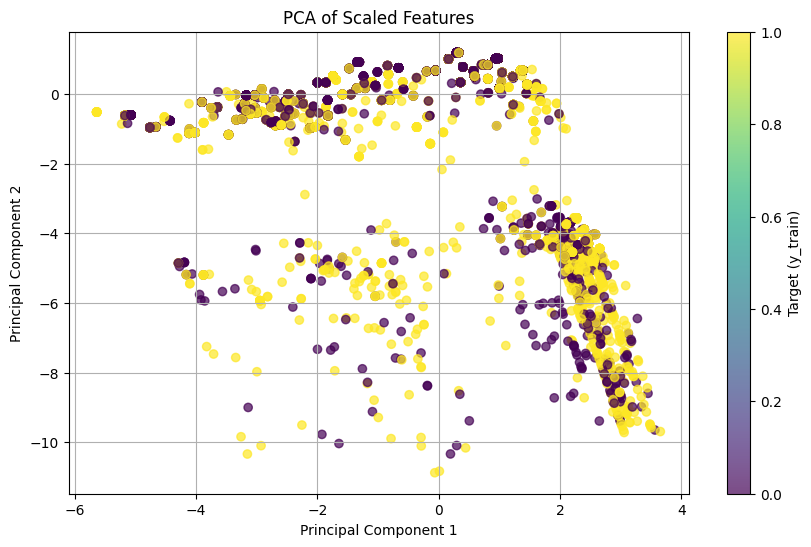

In [ ]:
from sklearn.decomposition import PCA

# Reduce to 2 principal components
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_train_scaled)

# Scatter plot for PCA-reduced data
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', alpha=0.7)

plt.title('PCA of Scaled Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target (y_train)')
plt.grid(True)
plt.show()



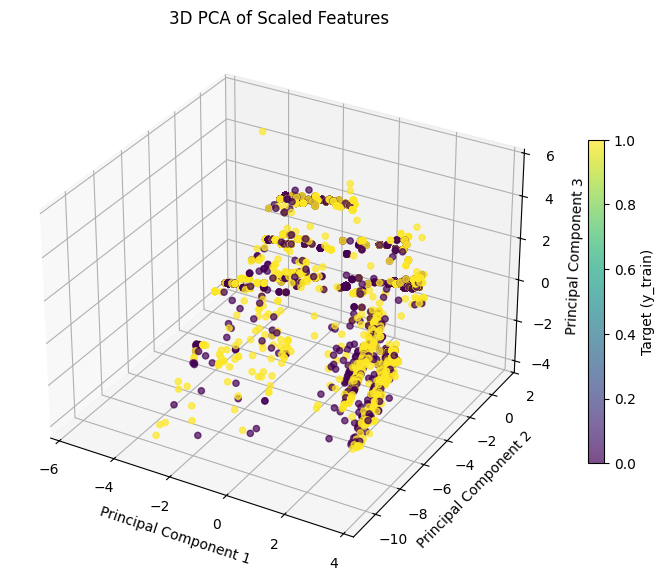

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA to reduce to 3 components
pca = PCA(n_components=10)
X_pca_3d = pca.fit_transform(X_train_scaled)

# Create 3D Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                     c=y_train, cmap='viridis', alpha=0.7)

# Labels and title
ax.set_title('3D PCA of Scaled Features')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Color bar for target labels
colorbar = plt.colorbar(scatter, ax=ax, shrink=0.6)
colorbar.set_label('Target (y_train)')

plt.show()

In [ ]:
print(pca.explained_variance_ratio_)


[0.08865858 0.06244346 0.05034726 0.03987481 0.03826864 0.0342397
 0.03173888 0.03083944 0.03051866 0.02983686]


In [ ]:
# Re-define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 128  # Increased from 80 to 128 neurons
hidden_nodes_layer2 = 64   # Increased from 30 to 64 neurons
hidden_nodes_layer3 = 32   # Added another hidden layer
hidden_nodes_layer4 = 16   # Added another hidden layer
hidden_nodes_layer5 = 8    # Added another hidden layer
hidden_nodes_layer6 = 4    # Added another hidden layer
hidden_nodes_layer7 = 2    # Added another hidden layer

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation="tanh", input_dim=39))  # Changed from 'relu' to 'tanh'

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Fifth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="relu"))

# Sixth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="relu"))

# Seventh hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer7, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           5,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,169 (63.16 KB)

 Trainable params: 16,169 (63.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
from keras.callbacks import Callback

class StoreWeightsEveryFiveEpochs(Callback):
    def __init__(self):
        super().__init__()
        self.saved_weights = {}  # Dictionary to store weights at specific epochs

    def on_epoch_end(self, epoch, logs=None):
        # Store weights every 5 epochs
        if (epoch + 1) % 5 == 0:
            self.saved_weights[epoch + 1] = self.model.get_weights()
            print(f"\nEpoch {epoch + 1}: Weights stored in memory (not saved to file).")

# Initialize the callback
store_weights_callback = StoreWeightsEveryFiveEpochs()

# Implement early stopping to prevent overfitting
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with the callback
fit_model = nn.fit(X_train_scaled, y_train, epochs=200, validation_split=0.2, callbacks=[early_stop], verbose=1) # Changed from 100 epochs to 200 epochs


Epoch 1/200
490/490 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7083 - loss: 0.5920 - val_accuracy: 0.7287 - val_loss: 0.5506
Epoch 2/200
490/490 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7458 - loss: 0.5394 - val_accuracy: 0.7256 - val_loss: 0.5505
Epoch 3/200
490/490 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7494 - loss: 0.5340 - val_accuracy: 0.7287 - val_loss: 0.5501
Epoch 4/200
490/490 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7477 - loss: 0.5356 - val_accuracy: 0.7333 - val_loss: 0.5462
Epoch 5/200
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7584 - loss: 0.5241 - val_accuracy: 0.7325 - val_loss: 0.5425
Epoch 6/200
490/490 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7453 - loss: 0.5399 - val_accuracy: 0.7340 - val_loss: 0.5436
Epoch 7/200
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7540 - loss: 0.5293 - val_accuracy: 0.7333 - val_loss: 0.5471
Epoch 8/200
490/490 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7599 - loss: 0.5201 - val_accu

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

204/204 - 1s - 3ms/step - accuracy: 0.7525 - loss: 0.5313
Loss: 0.5313128232955933, Accuracy: 0.7524524927139282


In [ ]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity_Optimization.h5')